Explore Pytrends API Capabilities 

documentation: https://pypi.org/project/pytrends/ 

helpful article: https://lazarinastoy.com/the-ultimate-guide-to-pytrends-google-trends-api-with-python/

In [1]:
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
import pandas as pd
import gtab

In [2]:
# establish a connection to google 
# host language (hl) is english, timezone (tz) is the number of minutes from UTC. 
# adjust the timezone using non-negative value from this table (300 = EST)
# https://forbrains.co.uk/international_tools/earth_timezones 

pytrends = TrendReq(hl='en-US', tz=300) 

In [5]:
# set the boundaries of the data results, including the category (cat), timeframe, region (geo),
# or the google property (gprop) - defaults to web search, can be images, news, or froogle (shopping)
# cat = categories, numeric assignments at the link below. 0 is all categories
# https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories 

# set keyword search list can only be max 5 items
kw_list = ["ROG Ally", "Steam Deck"]

pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')

In [6]:
# method for results over time, returns a pandas dataframe
df = pytrends.interest_over_time()
df.head()

c:\Users\carld\miniconda3\envs\mads\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


,ROG Ally,Steam Deck,isPartial
date,,,
2019-10-06,0,0,False
2019-10-13,0,0,False
2019-10-20,0,0,False
2019-10-27,0,0,False
2019-11-03,0,0,False


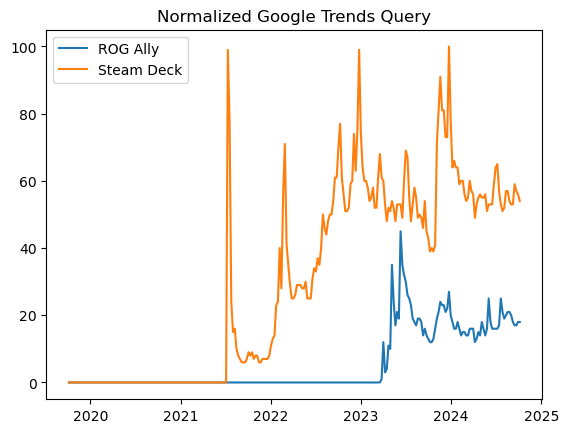

In [22]:
# visualize results
# results are always normalized to 100 as the max value

plt.plot(df.index, df['ROG Ally'], label='ROG Ally')
plt.plot(df.index, df['Steam Deck'], label='Steam Deck')
plt.legend()
plt.title('Normalized Google Trends Query')
plt.show()

In [ ]:
# the primary challenge with the Google Trends data is that it is normalized within the search. This means
# you are limited to the 5 search terms for comparison. 

# there is a package that can put multiple Google Trends queries on the same scale called gtab
# the package was created as a part of a Cornell paper https://arxiv.org/abs/2007.13861 

# creating the same query as the combined query above should create a chart of the same shape
t = gtab.GTAB()
t.set_options(pytrends_config={"timeframe": "2020-01-01 2024-10-11"})
query_rog = t.new_query("ROG Ally")
query_steam = t.new_query("Steam Deck")

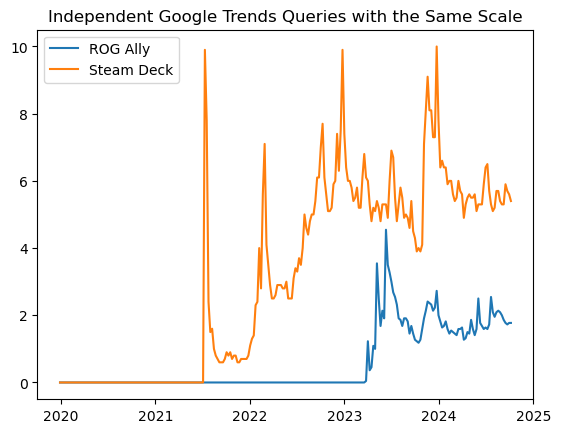

In [23]:
# plot the two separate queries
plt.plot(query_rog.index, query_rog.max_ratio, label='ROG Ally')
plt.plot(query_steam.index, query_steam.max_ratio, label='Steam Deck')
plt.legend()
plt.title('Independent Google Trends Queries with the Same Scale')
plt.show()